In [17]:
# global definitions (Fig 9)

import pandas as pd

import seaborn as sn

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import numpy as np

from common_defs import *

# US
followers_latent_dimensions_file = '/home/foula/linate/plos_asonam_exp_data/us/exp_results/source_ideological_dimensions.csv'
parliamentarians_latent_dimensions_file = '/home/foula/linate/plos_asonam_exp_data/us/exp_results/target_ideological_dimensions.csv'
parliamentarians_group_file = '/home/foula/linate/plos_asonam_exp_data/us/UnitedStates_reference_group.csv'
group_attitudes_file = '/home/foula/linate/plos_asonam_exp_data/us/UnitedStates_group_attitudes.csv'
group_graph_color_and_location_file = '/home/foula/linate/plos_asonam_exp_data/us/party_graph_colors_and_location.csv'
graph_xlim = (-1.5, 2)
graph_ylim = (-1.5, 3)
country = 'US'
graph_text_x = 0.3
graph_text_y = 2.7
legend_loc = 'lower right'
graph_filename = '/home/foula/linate/plos_asonam_exp_data/us/us_latent.pdf'

# Chile
#followers_latent_dimensions_file = '/home/foula/linate/plos_asonam_exp_data/chile_own/exp_results/source_ideological_dimensions.csv'
#parliamentarians_latent_dimensions_file = '/home/foula/linate/plos_asonam_exp_data/chile_own/exp_results/target_ideological_dimensions.csv'
#parliamentarians_group_file = '/home/foula/linate/plos_asonam_exp_data/chile_own/ChileOwn_reference_group.csv'
#group_attitudes_file = '/home/foula/linate/plos_asonam_exp_data/chile_own/ChileOwn_group_attitudes.csv'
#group_graph_color_and_location_file = '/home/foula/linate/plos_asonam_exp_data/chile_own/party_graph_colors_and_location.csv'
#graph_xlim = (-1.5, 3)
#graph_ylim = (-2, 3)
#country = 'Chile'
#graph_text_x = 0.5
#graph_text_y = 2.7
#legend_loc = 'lower right'
#graph_filename = '/home/foula/linate/plos_asonam_exp_data/chile_own/chile_latent.pdf'

In [18]:
# load latent dimensions : followers

followers_df = pd.read_csv(followers_latent_dimensions_file)
followers_df.head()

,source_id,latent_dimension_0,latent_dimension_1,latent_dimension_2,latent_dimension_3,latent_dimension_4,latent_dimension_5,latent_dimension_6,latent_dimension_7,latent_dimension_8,...,latent_dimension_433,latent_dimension_434,latent_dimension_435,latent_dimension_436,latent_dimension_437,latent_dimension_438,latent_dimension_439,latent_dimension_440,latent_dimension_441,latent_dimension_442
0,0,1.253166,0.346189,0.203365,0.001125,-0.231208,-0.125653,-0.175717,0.286681,-0.077901,...,0.020945,0.234148,0.042734,0.285813,-0.000494,-0.020715,0.002889,-0.025367,0.019210,1.388222e-16
1,1,1.076779,0.343208,0.154820,-0.285208,-0.052553,-0.102247,-0.504971,0.577824,-0.178528,...,-0.097973,0.506872,0.192014,0.572982,-0.086534,-0.177192,-0.508741,-0.103385,0.501219,2.442755e-14
2,2,0.728916,1.643951,-0.774400,-0.057084,-0.705330,-0.092744,-0.257281,0.461018,-0.205696,...,0.328046,0.003513,-0.012380,0.026344,0.004212,-0.090021,-0.238251,0.137487,-0.179469,6.970540e-15
3,3,1.144569,0.682719,0.036358,0.009795,-0.333424,-0.137905,-0.259630,0.323169,-0.091464,...,-0.015265,0.001536,-0.004060,0.038722,0.012316,-0.031914,0.029423,0.188738,0.041081,-5.518132e-15
4,4,1.203907,0.643466,0.040767,0.041686,-0.385317,-0.167959,-0.453127,0.532405,-0.176875,...,0.054264,0.454002,0.052642,0.512873,-0.004641,-0.068914,0.069637,0.327685,0.101503,3.123454e-15


In [19]:
# load latent dimensions : parliamentarians

parliamentarians_df = pd.read_csv(parliamentarians_latent_dimensions_file)
parliamentarians_df['target_id'] = parliamentarians_df['target_id'].astype(int)   # To mitigate ID as float issue
parliamentarians_df.head()

# and parliamentarians group info
parliamentarians_group_df = pd.read_csv(parliamentarians_group_file)
parliamentarians_group_df.head()

# and merge it with latent_dimensions_info
print(parliamentarians_df.shape)
parliamentarians_df = pd.merge(parliamentarians_df, parliamentarians_group_df, left_on = 'target_id', 
                               right_on = 'i', how = 'inner')
print(parliamentarians_df.shape)
parliamentarians_df.head()

# also identify parliamentarians' party names
group_names_df = pd.read_csv(group_attitudes_file)
#ches_cols = []
#for c in group_names_df.columns:
#    if c.startswith('ches'):
#        ches_cols.append(c)
#group_names_df.dropna(subset = ches_cols, inplace = True)
group_names_df = group_names_df[['k', 'party']]
group_names_df.head()
#
parliamentarians_df = pd.merge(parliamentarians_df, group_names_df, on = 'k', how = 'inner')
print(parliamentarians_df.shape)
parliamentarians_df.head()

# finally add color information for the graph
colors_and_location_df = pd.read_csv(group_graph_color_and_location_file)
parliamentarians_df = pd.merge(parliamentarians_df, colors_and_location_df, on = 'party', how = 'inner')
print(parliamentarians_df.shape)
parliamentarians_df.head()

(443, 444)
(443, 446)
(443, 447)
(443, 450)


,target_id,latent_dimension_0,latent_dimension_1,latent_dimension_2,latent_dimension_3,latent_dimension_4,latent_dimension_5,latent_dimension_6,latent_dimension_7,latent_dimension_8,...,latent_dimension_439,latent_dimension_440,latent_dimension_441,latent_dimension_442,i,k,party,color,dim_x,dim_y
0,0,0.476105,1.771641,-0.315566,-0.028461,-0.453201,-0.109510,-0.294759,0.200255,-0.208773,...,-0.082080,-0.128952,0.142756,-3.078353e-16,0,0,Republican,red,0.1,0.1
1,1,0.540251,1.841261,-0.672348,0.035959,-0.543519,-0.299674,0.199573,-0.702211,0.089042,...,0.474272,0.001346,-0.099305,-3.078353e-16,1,0,Republican,red,0.1,0.1
2,2,0.566663,1.314719,-0.405349,-0.014971,-0.179132,-0.225200,0.292640,-0.494167,0.194378,...,-0.016220,0.013390,-0.004552,-3.078353e-16,2,0,Republican,red,0.1,0.1
3,3,0.602680,1.577163,-0.433120,-0.034136,-0.439337,-0.314493,-0.279050,0.050905,-0.056472,...,0.046833,-0.019449,-0.010880,-3.078353e-16,3,0,Republican,red,0.1,0.1
4,4,0.519421,1.863517,-0.752052,0.424592,0.199406,-0.301240,-0.073611,-0.157860,-0.030443,...,-0.006465,-0.015582,-0.005165,-3.078353e-16,4,0,Republican,red,0.1,0.1


In [20]:
group_size_df = (parliamentarians_df.groupby(['party']).size()).to_frame().reset_index()

group_size_df.head()

,party,0
0,Democrat,209
1,Republican,234


In [21]:
# also compute dimensions of parties (as the mean point of parliamentarias in the party)

group_dimensions_df = parliamentarians_df.groupby('party')[['latent_dimension_0', 'latent_dimension_1']].mean()
group_dimensions_df = group_dimensions_df.reset_index()
print(group_dimensions_df.shape)
group_dimensions_df = pd.merge(group_dimensions_df, colors_and_location_df, on = 'party', how = 'inner')
print(group_dimensions_df.shape)
group_dimensions_df.head(20)

(2, 3)
(2, 6)


,party,latent_dimension_0,latent_dimension_1,color,dim_x,dim_y
0,Democrat,-0.545022,0.716591,blue,0.1,0.1
1,Republican,0.598094,1.281848,red,0.1,0.1


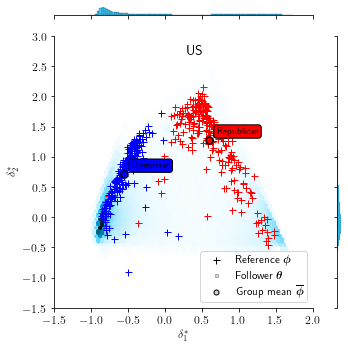

In [22]:
# visualization of two dimensions

xdim = 'latent_dimension_0'
ydim = 'latent_dimension_1'

color_dim = 'color'

ren = {xdim: 'x', ydim: 'y'}

disp = {}
for _, row in colors_and_location_df.iterrows():
    disp[row['party']] = (float(row['dim_x']), float(row['dim_y']))
    
df = followers_df.rename(columns = ren).drop_duplicates(subset = ['x', 'y'])
#df = df[~df.index.duplicated()]

# use the followers + parliamentarians
g = sn.jointplot(x = 'x', y = 'y', data = df, space = 0, color = "deepskyblue", 
                 kind = 'hex', ratio = 10, height = 5, xlim = graph_xlim, ylim = graph_ylim) 

for _, row in parliamentarians_df.iterrows():
    g.ax_joint.plot(row[xdim] , row[ydim], '+', color = row[color_dim], mew = 1.0, ms = 7)

for _, row in group_dimensions_df.iterrows():
    g.ax_joint.plot(row[xdim], row[ydim], 'o', color = row[color_dim], mew = 1.5, ms = 7, mec = 'k')
    
    txt = g.ax_joint.text(row[xdim] + disp[row['party']][0],
                          row[ydim] + disp[row['party']][1], row.party, 
                          color = 'black', bbox = dict(boxstyle = "round", ec = 'black', fc = row[color_dim], alpha = 1),
                          fontsize = 9)

g.ax_joint.set_xlabel(r'$\delta^*_1$')
g.ax_joint.set_ylabel(r'$\delta^*_2$')

txt = g.ax_joint.text(graph_text_x, graph_text_y, country, fontsize = 14)
plt.legend(handles = ideo_legend, loc = legend_loc, fontsize = bidimensional_legend_fs)

plt.tight_layout()

plt.savefig(graph_filename)

plt.show()